<a href="https://colab.research.google.com/github/Abhish777/MLB/blob/master/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def load_data():
    URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    data = pd.read_csv(URL_, header = None)
    print(data)
    
    # make the dataset linearly separable
    data = data[:100]
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
    data = np.asmatrix(data, dtype = 'float64')
    return data
data = load_data()

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


**Visualizing the dataset with 2 of the features**

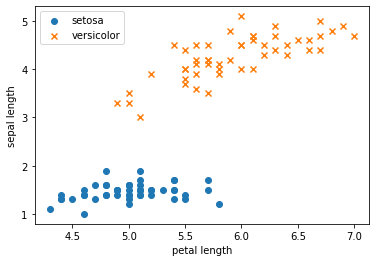

In [2]:
plt.scatter(np.array(data[:50,0]), np.array(data[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,0]), np.array(data[50:,2]), marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

**Implement the algorithm**

In [14]:
def perceptron(data, num_iter):
    features = data[:, :-1]
    labels = data[:, -1]

    # set weights to zero
    w = np.zeros(shape=(1, features.shape[1]+1))
    misclassified_ = [] 
  
    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            x = np.insert(x,0,1) # Add bias x0
            y = np.dot(w, x.transpose()) # weighted sum
            target = 1.0 if (y > 0) else 0.0
            
            delta = (label.item(0,0) - target) # loss
            
            if(delta): # misclassified
                misclassified += 1
                print(f'Expected {label.item(0,0)} classified as {target}')
                w += (delta * x) # Add misclassified weights with sign to existing weights
        
        misclassified_.append(misclassified)
    return (w, misclassified_)
             
num_iter = 10
w, misclassified_ = perceptron(data, num_iter)

[[0. 0. 0. 0. 0.]]
-----
Expected 1.0 classified as 0.0
[[1.  7.  3.2 4.7 1.4]]
[[1.  7.  3.2 4.7 1.4]]
Expected 0.0 classified as 1.0
[[-1.  -5.1 -3.5 -1.4 -0.2]]
[[ 0.   1.9 -0.3  3.3  1.2]]
Expected 0.0 classified as 1.0
[[-1.  -4.9 -3.  -1.4 -0.2]]
[[-1.  -3.  -3.3  1.9  1. ]]
Expected 1.0 classified as 0.0
[[1.  7.  3.2 4.7 1.4]]
[[ 0.   4.  -0.1  6.6  2.4]]
Expected 0.0 classified as 1.0
[[-1.  -5.1 -3.5 -1.4 -0.2]]
[[-1.  -1.1 -3.6  5.2  2.2]]


**To plot the number of misclassified samples in each iteration**

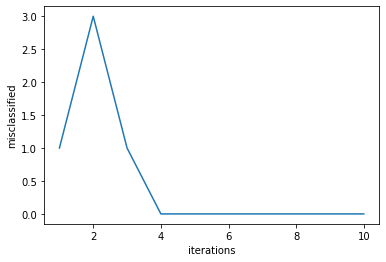

In [9]:
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()